#PROYECTO VISUALIZACIÓN DE DATOS
##Primera entrega

---
Datos extraidos de:
https://dasl.datadescription.com/datafile/hopkins-forest/

---
Contexto:
Hopkins Memorial Forest es una reserva de 2500 acres en Massachusetts, Nueva York
y Vermont administrada por el Williams College Center for Environmental Studies
(CES). Como parte de su misión, el CES monitorea los recursos y las condiciones
del bosque a largo plazo.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
import altair as alt
from vega_datasets import data
from math import log10

In [3]:
pd.set_option('display.max_columns', None) #Mostrar todas las columnas
sns.set(rc={'figure.figsize':(15,10)})

In [4]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [40]:
import pandas as pd
HF=pd.read_excel("/content/drive/MyDrive/Colab Notebooks/CARPETA VUSUAL.DATOS/ProyectoV/hopkins-forest.xlsx")
HF=pd.DataFrame(HFF,columns=['Date', 'Year', 'Month', 'Day', 'Day of Year', 'Avg Temp (C)',
       'Max Temp (C)', 'Min Temp (C)', 'Avg Temp (F)', 'Max Temp (F)',
       'Min Temp (F)', 'Avg Rel Hum (%)', 'Max Rel Hum (%)', 'Min Rel Hum (%)',
       'Avg Sol Rad (w/m^2)', 'Max Sol Rad (w/m^2)', 'Min Sol Rad (w/m^2)',
       'Total Sol Rad (w/m^2)', 'Avg Wind (mph)', 'Max Wind (mph)',
       'Min Wind (mph)', 'Avg Barom (mb)', 'Max Barom (mb)', 'Min Barom (mb)',
       'Precip (in)', 'Deep Well (ft)', 'Shallow Well (ft)', '80 cm Soil (C)',
       '10 cm Soil (C)'])
HF.head()

,Date,Year,Month,Day,Day of Year,Avg Temp (C),Max Temp (C),Min Temp (C),Avg Temp (F),Max Temp (F),Min Temp (F),Avg Rel Hum (%),...,Total Sol Rad (w/m^2),Avg Wind (mph),Max Wind (mph),Min Wind (mph),Avg Barom (mb),Max Barom (mb),Min Barom (mb),Precip (in),Deep Well (ft),Shallow Well (ft),80 cm Soil (C),10 cm Soil (C)
0,2011-01-01 00:00:00,2011,Enero,1,1,5.21,10.57,1.59,41.38,51.03,34.86,79.02,...,7780,0.53,8.55,0,1011.47,1014,1008,0.00,5.23,1.60,5.17,2.74
1,2011-02-01 00:00:00,2011,Enero,2,2,2.53,6.22,-2.96,36.55,43.20,26.67,79.34,...,5783,2.13,27.40,0,1008.17,1010,1007,0.07,5.20,1.18,5.20,2.67
2,2011-03-01 00:00:00,2011,Enero,3,3,-4.17,-1.63,-5.59,24.50,29.07,21.94,59.26,...,7503,4.43,26.74,0,1011.17,1013,1008,0.00,4.89,1.36,5.14,2.64
3,2011-04-01 00:00:00,2011,Enero,4,4,-3.97,1.79,-8.63,24.85,35.22,16.47,69.41,...,7066,0.43,11.84,0,1005.70,1012,1001,0.00,4.66,1.47,5.07,2.15
4,2011-05-01 00:00:00,2011,Enero,5,5,-3.13,0.47,-6.92,26.37,32.85,19.54,65.88,...,12221,3.38,26.08,0,1001.78,1003,1001,0.00,4.59,1.54,4.97,1.91


In [37]:
## lectura de la base: lina
#HF=pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Visualización de datos en Python/hopkins-forest.xlsx")
#HF=pd.DataFrame(HF,columns=['Date', 'Year', 'Month', 'Day', 'Day of Year', 'Avg Temp (C)',
       'Max Temp (C)', 'Min Temp (C)', 'Avg Temp (F)', 'Max Temp (F)',
       'Min Temp (F)', 'Avg Rel Hum (%)', 'Max Rel Hum (%)', 'Min Rel Hum (%)',
       'Avg Sol Rad (w/m^2)', 'Max Sol Rad (w/m^2)', 'Min Sol Rad (w/m^2)',
       'Total Sol Rad (w/m^2)', 'Avg Wind (mph)', 'Max Wind (mph)',
       'Min Wind (mph)', 'Avg Barom (mb)', 'Max Barom (mb)', 'Min Barom (mb)',
       'Precip (in)', 'Deep Well (ft)', 'Shallow Well (ft)', '80 cm Soil (C)',
       '10 cm Soil (C)'])
HF.head()

1

In [41]:
from os import replace
HF["Month"].replace([1,2,3,4,5,6,7,8,9,10,11,12],["Enero","Febrero", "Marzo","Abril",
"Mayo","Junio","Julio","Agosto","Septiembre",	"Octubre","Noviembre","Diciembre"],inplace=True)

In [42]:
HF.head()

,Date,Year,Month,Day,Day of Year,Avg Temp (C),Max Temp (C),Min Temp (C),Avg Temp (F),Max Temp (F),Min Temp (F),Avg Rel Hum (%),...,Total Sol Rad (w/m^2),Avg Wind (mph),Max Wind (mph),Min Wind (mph),Avg Barom (mb),Max Barom (mb),Min Barom (mb),Precip (in),Deep Well (ft),Shallow Well (ft),80 cm Soil (C),10 cm Soil (C)
0,2011-01-01 00:00:00,2011,Enero,1,1,5.21,10.57,1.59,41.38,51.03,34.86,79.02,...,7780,0.53,8.55,0,1011.47,1014,1008,0.00,5.23,1.60,5.17,2.74
1,2011-02-01 00:00:00,2011,Enero,2,2,2.53,6.22,-2.96,36.55,43.20,26.67,79.34,...,5783,2.13,27.40,0,1008.17,1010,1007,0.07,5.20,1.18,5.20,2.67
2,2011-03-01 00:00:00,2011,Enero,3,3,-4.17,-1.63,-5.59,24.50,29.07,21.94,59.26,...,7503,4.43,26.74,0,1011.17,1013,1008,0.00,4.89,1.36,5.14,2.64
3,2011-04-01 00:00:00,2011,Enero,4,4,-3.97,1.79,-8.63,24.85,35.22,16.47,69.41,...,7066,0.43,11.84,0,1005.70,1012,1001,0.00,4.66,1.47,5.07,2.15
4,2011-05-01 00:00:00,2011,Enero,5,5,-3.13,0.47,-6.92,26.37,32.85,19.54,65.88,...,12221,3.38,26.08,0,1001.78,1003,1001,0.00,4.59,1.54,4.97,1.91


In [9]:
pd.set_option('display.max_columns', None) #Mostrar todas las columnas
sns.set(rc={'figure.figsize':(15,10)})

In [10]:
print('Filas: ', HF.shape[0])
print('Columnas: ', HF.shape[1])

Filas:  365
Columnas:  29


#Abstraer ¿Qué?


*Existe 365 items en este data set de una serie temporal del año completo 2011 sin datos faltantes,ya que durante un año se registraron medidas climaticas temporales en formato año, dia, mes, hora ademas el mismo formato pero separado,siendo asi un atributo cuantitativo ordenado secuencialmente.Por lo cual la Información es dinamica.*


*Contiene datos cuantitativos, con maximo, minimo, y media por dia de cada variable como temperatura, presión, precipitación, velocidad del viento entre otros.*


# Primera Visualización
#### *Realizado por Miguel Ávila*

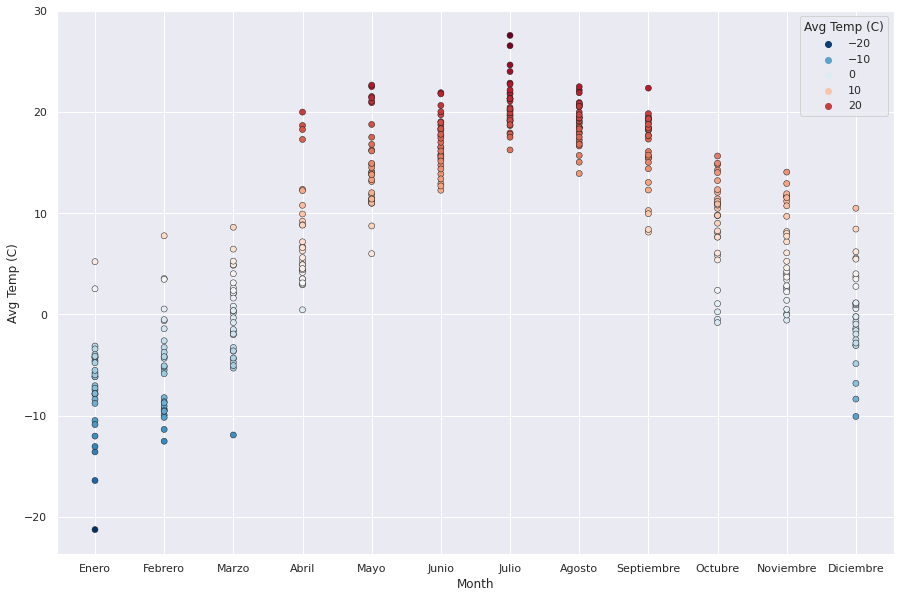

In [11]:
sns.scatterplot(data=HF,  x="Month", y="Avg Temp (C)",hue = "Avg Temp (C)",palette="RdBu_r",edgecolor="k") # INVERTIR LOS COLORES

#CMRmap, GnBu_r,coolwarm,inferno,flare_r,icefire,RdYlBu_r,gist_heat,RdBu_r,RdBu

#¿Qué?
Se representan los datos de forma espacial, los tipos de variables son cuantitativos, desagregados por mes, se involucra la temperatura en grados centigrados y los dias por mes siendo la información estatica.

###*caraterización de las variables*

Month: Variable ordenada cualitativa, secuencial, iniciando en Enero y finalizando en diciembre.

Day of Month:  Variable ordenada cuantitativa secuencial por mes que indica el dia del mes. Su rango es comprendido por valores entre 1 y 31.

Avg Temp(C): Variable cuantitativa que indica la temperatura media medida respecto a cada dia tomando valores positivos y negativos ya que existen temperaturas bajo cero.



#¿Por qué?
*/Descubrir, discriminar y comparar*

Este tipo de grafico nos permite visualizar los comportamientos de la tempertatura durante todo el año, agrupado por mes nos permite **comparar** entre los meses a travez del tiempo, ademas nos permite **descubrir** similitudes y tendencias atraves del año

##MARCA
* Marca de punto para representar el valor de la temperatura de los dias

##CANALES

* Canal de posición espacial vertical y horizontal para representar el valor de la temperatura.
* Canal de posición espacial vertical para segmentar el valor de la temperatura por mes.
* Canal de color con paleta frio caliente para los distinguir las diferentes temperaturas.
* Canal de color para los delimitar las diferentes temperaturas.
* Canal de saturación para los delimitar las diferentes temperaturas.
* Canales de posisión de escala in-alineada vertical. dado que las temperaturas presentan rangos diferentes.


##Analisis
Se logra percibir el comportamiento de la temperatura a travez del año facilmente,precisamente por el uso adecuado de los canales de espacio y color ayudan aún mas lograr entender, comparar e identificar el  comportamiendo de la temperatura por mes y y por año a la vez, todo en la misma visualización.
* Discrimina y se separan los valores tanto por mes y por año lo que impide que se tenga sobreposición de valores(ocultación).

* Tiene un popout visual excelente ya que rapidamente se distiguen a que mes pertenece el valor de la temperatura y las tendencias.

* Resolución sobre inmersión: existe suficiente resolución para comprender la información.

* cumple con la función de visualizar facilmente la temperatura a travez del tiempo y luego la forma.  

##Insight  
Se obtiene que en el mes de Junio, se registraron las temperaturas más altas, con 28°C, adicionalmente se observa que los meses con temperaturas más altas, son junio, julio y agosto. Además, se obtiene que en el mes de enero se registran las temperaturas más bajas del año, junto con el mes de febrero.  


# Segunda Visualización
##### *Realizado por Lina Buitrago*

In [12]:
HF["Month"].replace(["Enero","Febrero", "Marzo","Abril",
"Mayo","Junio","Julio","Agosto","Septiembre",	"Octubre","Noviembre","Diciembre"],["------Enero","-----Febrero", "----Marzo","---Abril",
"--Mayo","-Junio","......Julio",".....Agosto","....Septiembre",	"...Octubre","..Noviembre",".Diciembre"],inplace=True)
flights = HF.pivot("Month", "Day", "Avg Temp (C)")
df = sns.load_dataset('flights')
#CMRmap, GnBu_r,coolwarm,inferno,flare_r,icefire,RdYlBu_r,gist_heat,RdBu_r,RdBu

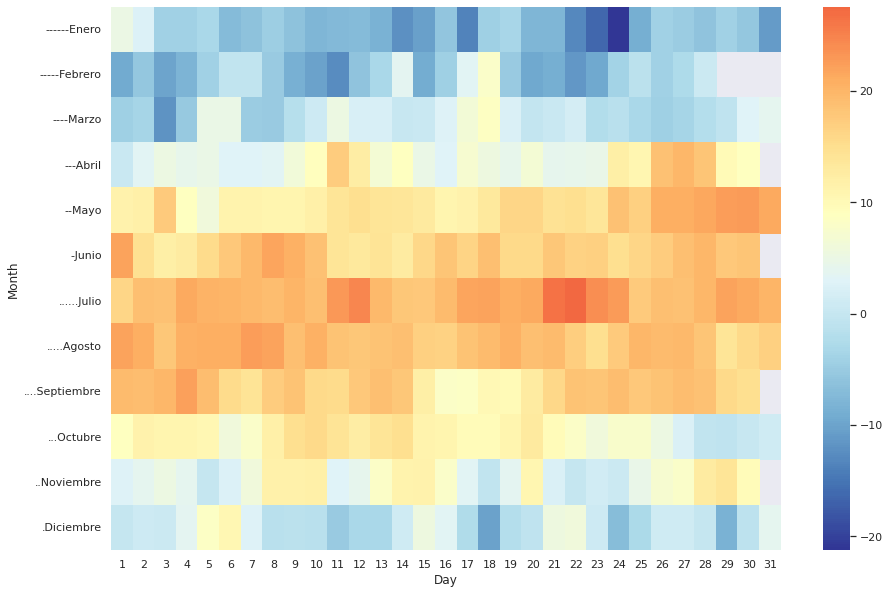

In [13]:
ax = sns.heatmap(flights,center=9,cmap="RdYlBu_r")

#¿Qué?
Se representan los datos de forma espacial, los tipos de variables son cuantitativos, desagregados por mes , se involucra la temperatura en grados centigrados y los dias por mes siendo la información estatica.

###*caraterización de las variables*

Month: Variable ordenada cualitativa, secuencial, iniciando en Enero y finalizando en diciembre.

Day of Month:  Variable ordenada cuantitativa secuencial por mes que indica el dia del mes. Su rango es comprendido por valores entre 1 y 31.

Avg Temp(C): Variable cuantitativa que indica la temperatura media medida respecto a cada dia tomando valores positivos y negativos ya que existen temperaturas bajo cero.


#¿Por qué?
*/Identificar, discriminar y comparar*

Este tipo de grafico nos permite visualizar los comportamientos de la tempertatura durante todo el año y de cada dia tambien, y con la forma de tablero permite **comparar** entre los meses a travez del tiempo, ademas nos permite **descubrir** las tendencias através del año, haciendo un barrido visual facilmente.

##MARCA
* Marca de area para representar la temperatura.

##CANALES

* Canal de posición espacial vertical y horizontal para representar la temperatura.
* Canal de posición espacial vertical para segmentar el valor de la temperatura por dia.
* Canal de posición espacial horizontal para segmentar el valor de la temperatura por mes.
* Canal de color con paleta frio caliente para los distinguir las diferentes temperaturas.
* Canal de saturación color para los segmentar las diferentes temperaturas.
* Canales de posisión de escala alineada vertical y horizontal. ya que se alinean las posiciones de la marca.


##Analisis
Nuevamente se logra percibir el comportamiento de la temperatura a travez del año facilmente, precisamente por el uso adecuado de los canales de espacio y color ayudan aún mas a lograr entender, comparar el comportamiendo de la temperatura por mes y y por año a la vez, todo en la misma visualización.

* Discrimina y se separan los valores tanto por mes y por día lo que impide que se tenga sobreposición de valores(ocultación).

* Tiene un popout visual excelente ya que rapidamente se distigue a que mes pertenece el valor de la temperatura las tendecias y similitudes.

* Resolución sobre inmersión: existe suficiente resolución para comprender la información.

* cumple con la función de visualizar la temperatura a travez del tiempo y luego aunque se puede saturar la visión por la cantidad de información.

##Insight 
El mapa de calor, permite observar las temperaturas registradas en cada día del año, obteniendo así que el día 22 de julio se registró la temperatura más alta del año, y el 24 de Enero se registró la temperatura más baja. Adicionalmente el mapa de calor permite ver una tendencia en las temperaturas, siendo los meses de mitad de año los más calidos y los meses iniciales y finales los más frios.  


# Tercera Visualización
#### *Realizado por Lina Buitrago*

In [14]:
media1 = HF.groupby(['Month']).mean()
media2 = media1['Avg Temp (C)']

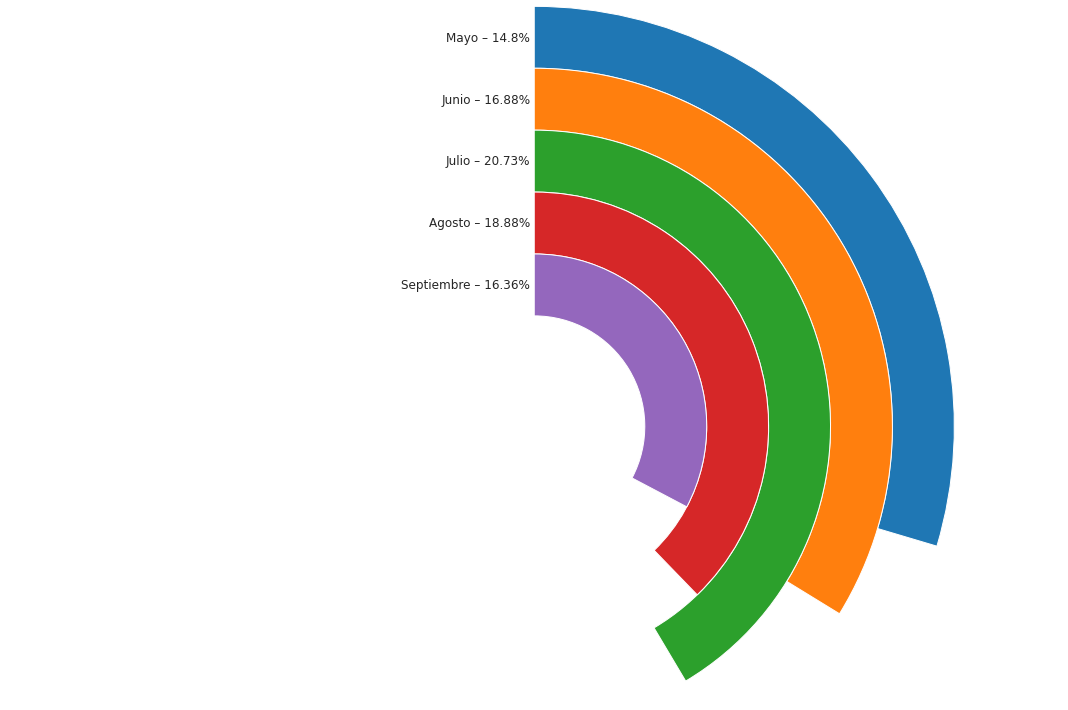

In [15]:
causas = ["Mayo", "Junio", "Julio", "Agosto", "Septiembre"]
porcentaje = [14.80, 16.88, 20.73, 18.88, 16.36]

n = len(porcentaje)
porcentaje_circulo = max(porcentaje) / 50

r = 1.9  
r_inner = 0.5  

w = (r - r_inner) / n

colors = plt.cm.tab10.colors


fig, ax = plt.subplots()
ax.axis("equal")

for i in range(n):
    radius = r - i * w
    ax.pie([porcentaje[i] / max(porcentaje) * porcentaje_circulo], radius=radius, startangle=90,
           counterclock=False,
           colors=[colors[i]],
           labels=[f'{causas[i]} – {porcentaje[i]}%'], labeldistance=None,
           wedgeprops={'width': w, 'edgecolor': 'white'})
    ax.text(0, radius - w / 2, f'{causas[i]} – {porcentaje[i]}% ', ha='right', va='center')


plt.tight_layout()
plt.show()

# **¿Qué?**   

Esta visualización es una modificacipon del tradicional grafico de barras, el cual esta plasmando la participación de cinco variables relacionadas y de tipo cuantitativo. La variable Avg Temp(C), indica la temperatura media alcanzada en los meses más calurosos (mayo, junio, julio, agosto y septiembre)
# **¿Por qué?** 

Las acciones que permite realizar esta visualización encontramos la de presentar, al buscar se puede realizar un locate. Entre los targets se puede resaltar el de poder comparar de manera cualitativa las cinco variables cuantitativas.  

# **Tarea que cumple**  
La tarea que cumple la visualización es la de presentar la media de la temperatura alcanzada en los meses de mayo, junio, julio, agosto y septiembre.

# **Canales**  

+ Posición radial y tamaño para reflejar el valor relativo de cada variable.
+ Color se utiliza para diferenciar las distintas variables cualitativas.

# **Marcas**  

Marca de área (en este caso circulos concentricos) sirven para clasificar a las variables cuantitativas.

# **Análisis del gráfico**  
Se observa con facilidad la media de los valores que tomaron cada una de las varibales, así como cada uno de sus cuantiles, a grandes rasgos, la información y siguiendo las normas generales, se logra resumir el comportamiendo de las variables en la misma visualización. Discrimina y se separan variables y rangos para cada unidad de medidad según la variable.

# **Mejoras posibles**  
Una paleta de colores que permita distinguir los resultados de una manera más sencilla.  


#Cuarta Visualización
#### *Por Miguel Ávila*

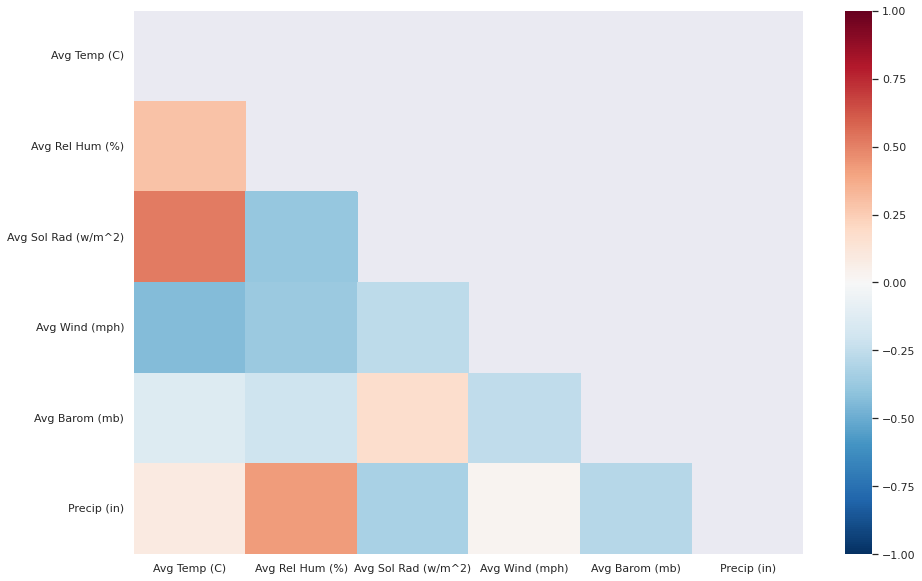

In [16]:
# Calculate and plot
features2 = ['Avg Temp (C)', 'Avg Rel Hum (%)',
       'Avg Sol Rad (w/m^2)', 'Avg Wind (mph)',
        'Avg Barom (mb)', 
       'Precip (in)']
corr_matrix = HF[features2].corr()
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_matrix, cmap="RdBu_r",mask=mask, square=False, vmin=-1, vmax=1)
#CMRmap, GnBu_r,coolwarm,inferno,flare_r,icefire,RdYlBu_r,gist_heat,RdBu_r,RdBu

# **¿Qué?**   

el set de datos se presenta espacialmente con las variables ordenadas en sus respectivos ejes,cuantitativas.

# **¿Por qué?** 

Se busca identificar, comparar y presentar, las correlaciones entre las variables de interés.  

# **Tarea que cumple**  

La tarea que cumple la visualización es la de presentar la relación de cada una de las variables de interés.
ademas nos permite **descubrir** las correlaciones  detodas las variables entre si.

##MARCA
* Marca de area.

##CANALES

* Canal de posición espacial vertical y horizontal el color según su correlación entre las misma.
* Canal de color con  para los distinguir los diferentes rango de correlación entre variables.
* Canal de saturación color para los segmentar las diferentes correlaciones entre variables.
* Canales de posisión de escala alineada vertical y vertical. ya que se alinean las posiciones de la marca.


##Analisis
No se logra  facilmente entender a simple vista las correlaciones entre variables ya que se requiere de inmersión sobre resolución para entender el comportamiento de dichas variables que se estas correlacionando, el canal de color permite entender mas facil por sus escalas las correlaciones fuertes y debiles lo que permite identificarlas mejor y asi comparar el comportamiento entre variables.

* Discrimina y se separa las variables lo que inpide que se crucen o exista ocultación de información.

* Tiene un popout visual muy regular ya que necesita de tiempo para se disguir y comprender las relaciones entre variables.


* Cumple con la función de visualizar las correlaciones entre variables en un solo grafico aunque carece de las etiquetas numericas.

#2 ENTREGA


#Detalle del proceso de extracción, transformación y limpieza de los datos

#Completitud


In [43]:
for col in HF.columns:
    num_missing =HF[col].isnull().sum()
    pct_missing = np.mean(HF[col].isnull())
    #print(col," - ",round(pct_missing*100, 2),"% - ",num_missing)
    print('{} - {}% - {}'.format(col,round(pct_missing*100, 2),num_missing))

Date - 0.0% - 0
Year - 0.0% - 0
Month - 0.0% - 0
Day - 0.0% - 0
Day of Year - 0.0% - 0
Avg Temp (C) - 0.0% - 0
Max Temp (C) - 0.0% - 0
Min Temp (C) - 0.0% - 0
Avg Temp (F) - 0.0% - 0
Max Temp (F) - 0.0% - 0
Min Temp (F) - 0.0% - 0
Avg Rel Hum (%) - 0.0% - 0
Max Rel Hum (%) - 0.0% - 0
Min Rel Hum (%) - 0.0% - 0
Avg Sol Rad (w/m^2) - 0.0% - 0
Max Sol Rad (w/m^2) - 0.0% - 0
Min Sol Rad (w/m^2) - 0.0% - 0
Total Sol Rad (w/m^2) - 0.0% - 0
Avg Wind (mph) - 0.0% - 0
Max Wind (mph) - 0.0% - 0
Min Wind (mph) - 0.0% - 0
Avg Barom (mb) - 0.0% - 0
Max Barom (mb) - 0.0% - 0
Min Barom (mb) - 0.0% - 0
Precip (in) - 0.0% - 0
Deep Well (ft) - 0.0% - 0
Shallow Well (ft) - 0.0% - 0
80 cm Soil (C) - 0.0% - 0
10 cm Soil (C) - 0.0% - 0


ESTA COMPLETA LA BASE, SIN DATOS FALTANTES


#Coherencia

In [44]:
HF[HF.duplicated()]

,Date,Year,Month,Day,Day of Year,Avg Temp (C),Max Temp (C),Min Temp (C),Avg Temp (F),Max Temp (F),Min Temp (F),Avg Rel Hum (%),...,Total Sol Rad (w/m^2),Avg Wind (mph),Max Wind (mph),Min Wind (mph),Avg Barom (mb),Max Barom (mb),Min Barom (mb),Precip (in),Deep Well (ft),Shallow Well (ft),80 cm Soil (C),10 cm Soil (C)


NO EXISTEN DATOS DUPLICADOS


#Consistencia

In [45]:
HF.dtypes

Date                      object
Year                       int64
Month                     object
Day                        int64
Day of Year                int64
Avg Temp (C)             float64
Max Temp (C)             float64
Min Temp (C)             float64
Avg Temp (F)             float64
Max Temp (F)             float64
Min Temp (F)             float64
Avg Rel Hum (%)          float64
Max Rel Hum (%)          float64
Min Rel Hum (%)          float64
Avg Sol Rad (w/m^2)      float64
Max Sol Rad (w/m^2)        int64
Min Sol Rad (w/m^2)        int64
Total Sol Rad (w/m^2)      int64
Avg Wind (mph)           float64
Max Wind (mph)           float64
Min Wind (mph)             int64
Avg Barom (mb)           float64
Max Barom (mb)             int64
Min Barom (mb)             int64
Precip (in)              float64
Deep Well (ft)           float64
Shallow Well (ft)        float64
80 cm Soil (C)           float64
10 cm Soil (C)           float64
dtype: object

estan bien, no necesitan cambio

#Selección de columnas

In [46]:
HF2=pd.DataFrame(HF,columns=['Date', 'Year', 'Month', 'Day', 'Day of Year','Avg Temp (C)', 'Avg Rel Hum (%)',
       'Avg Sol Rad (w/m^2)', 'Avg Wind (mph)',
        'Avg Barom (mb)', 
       'Precip (in)'])


In [47]:
HF2

,Date,Year,Month,Day,Day of Year,Avg Temp (C),Avg Rel Hum (%),Avg Sol Rad (w/m^2),Avg Wind (mph),Avg Barom (mb),Precip (in)
0,2011-01-01 00:00:00,2011,Enero,1,1,5.21,79.02,54.41,0.53,1011.47,0.00
1,2011-02-01 00:00:00,2011,Enero,2,2,2.53,79.34,40.44,2.13,1008.17,0.07
2,2011-03-01 00:00:00,2011,Enero,3,3,-4.17,59.26,52.47,4.43,1011.17,0.00
3,2011-04-01 00:00:00,2011,Enero,4,4,-3.97,69.41,49.41,0.43,1005.70,0.00
4,2011-05-01 00:00:00,2011,Enero,5,5,-3.13,65.88,85.46,3.38,1001.78,0.00
...,...,...,...,...,...,...,...,...,...,...,...
360,12/27/2011 12:00 AM,2011,Diciembre,27,361,1.14,82.23,26.67,2.04,1003.20,0.80
361,12/28/2011 12:00 AM,2011,Diciembre,28,362,-0.22,74.69,25.51,4.34,992.26,0.04
362,12/29/2011 12:00 AM,2011,Diciembre,29,363,-8.37,66.94,78.42,1.66,1006.50,0.00
363,12/30/2011 12:00 AM,2011,Diciembre,30,364,-0.96,75.55,26.94,0.59,1009.44,0.00


In [18]:
# NECESARIASSSS
!pip install -U -q ipywidgets
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json
      - Validating: OK
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json


In [20]:
#TAL VEZ NECESARIA
#!jupyter nbextension enable --py --sys-prefix widgetsnbextension
#!jupyter labextension install @jupyter-widgets/jupyterlab-manager

In [19]:
# Standard Data Science Helpers
import numpy as np
import pandas as pd
import scipy

import plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected=True)

import cufflinks as cf
cf.go_offline(connected=True)
cf.set_config_file(colorscale='plotly', world_readable=True)

# Extra options
pd.options.display.max_rows = 30
pd.options.display.max_columns = 25

# Show all code cells outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [21]:
import os
from IPython.display import Image, display, HTML

In [22]:
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

In [23]:
@interact
def correlations(column1=list(HF2.select_dtypes('number').columns), 
                 column2=list(HF2.select_dtypes('number').columns)):
    print(f"Correlation: {HF2[column1].corr(HF2[column2])}")

interactive(children=(Dropdown(description='column1', options=('Year', 'Day', 'Day of Year', 'Avg Temp (C)', '…

In [24]:
@interact
def scatter_plot(x=list(HF2.columns), 
                 y=list(HF2.columns)[1:]):
    HF2.iplot(kind='scatter', x=x, y=y, 
             mode='markers', 
             xTitle=x.title(), 
             yTitle=y.title(), 
             title=f'{y.title()} vs {x.title()}')

interactive(children=(Dropdown(description='x', options=('Date', 'Year', 'Month', 'Day', 'Day of Year', 'Avg T…

In [25]:
import cufflinks as cf

@interact
def scatter_plot(x=list(HF2.select_dtypes('number').columns), 
                 y=list(HF2.select_dtypes('number').columns)[1:],
                 theme=list(cf.themes.THEMES.keys()), 
                 colorscale=list(cf.colors._scales_names.keys())):
    
    HF2.iplot(kind='line', x=x, y=y, mode='markers', 
             xTitle=x.title(), yTitle=y.title(), 
             text='Month',
             title=f'{y.title()} vs {x.title()}',
            theme=theme, colorscale=colorscale,
            dimensions=(1000, 750))

interactive(children=(Dropdown(description='x', options=('Year', 'Day', 'Day of Year', 'Avg Temp (C)', 'Avg Re…

In [26]:

@interact
def scatter_plot(x=list(HF2.select_dtypes('number').columns), 
                 y=list(HF2.select_dtypes('number').columns)[1:],
                 color_var=['Avg Temp (C)', 'Avg Rel Hum (%)','Avg Sol Rad (w/m^2)', 'Avg Wind (mph)','Avg Barom (mb)', 'Precip (in)'],
                 theme=list(cf.themes.THEMES.keys()), 
                 colorscale=list(cf.colors._scales_names.keys())):
    
    HF2.iplot(kind='scatter', x=x, y=y, mode='markers', 
             categories=color_var, 
             xTitle=x.replace('_', ' ').title(), yTitle=y.replace('_', ' ').title(), 
             text='Avg Temp (C)',
             title=f"{y.replace('_', ' ').title()} vs {x.replace('_', ' ').title()}",
             theme=theme, colorscale=colorscale, 
             dimensions=(950, 650))

interactive(children=(Dropdown(description='x', options=('Year', 'Day', 'Day of Year', 'Avg Temp (C)', 'Avg Re…

In [29]:
from ipywidgets import interact_manual
@interact
def scatter_plot(x=list(HF2.select_dtypes('number').columns), 
                 y=list(HF2.select_dtypes('number').columns)[1:],
                 # categories=['binned_read_time', 'binned_word_count', 'publication', 'type'],
                 theme=list(cf.themes.THEMES.keys()), 
                 colorscale=list(cf.colors._scales_names.keys())):
    
    HF2.iplot(kind='line', x=x, y=y, mode='markers', 
             # categories=categories, 
             xTitle=x.title(), yTitle=y.title(), 
             text='Avg Temp (C)',
             title=f'{y.title()} vs {x.title()}',
             theme=theme, colorscale=colorscale)

interactive(children=(Dropdown(description='x', options=('Year', 'Day', 'Day of Year', 'Avg Temp (C)', 'Avg Re…

# JUSTIFICACIÓN
QUE TAREAS SE PUEDEN HACER
bastantes ya que se pueden hacer combinaciones entre las variables que se pueden elegir en cada eje. 
tambien se puede variar el tipo de estilo de grafico 
ademas el color que se quiere en la grafica


#insight
la facilidad para manipular el grafico

#bonus si ✌

In [33]:
 
# aroba interact_manual opcional